#### Скачайте файл с данными о публикациях на сайте Хабрхабр https://cloud.mail.ru/public/3ViL/q5xSM1TH2. Выполните следующие действия: 
1. Изучите датасет, попробуйте понять какой столбец за что отвечает. 
2. Удалите столбцы, названия которых заканчиваются на _lognorm. Выберите их с помощью filter() и удалите drop-ом: 
```
df.drop( 
filter(lambda c: c.endswith("_lognorm"), df.columns), 
axis=1,  # axis = 1: столбцы 
inplace=True, 
)  
# избавляет от необходимости сохранять датасет 
```
3. Столбец published (время публикации) содержит строки. Чтобы работать с этими данными как с датой временем публикации, приведите их к типу datetime: 
```
df["published"] = pd.to_datetime(df.published, yearfirst=True) 
```
4. Создайте несколько столбцов на основе данных о времени публикации: 
```
df["year"] = [d.year for d in df.published] 
df["month"] = [d.month for d in df.published] 
df["dayofweek"] = [d.isoweekday() for d in df.published] 
df["hour"] = [d.hour for d in df.published]
```

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv('howpop_train.csv', sep=',')

df.drop( 
    filter(lambda c: c.endswith("_lognorm"), df.columns), 
    axis=1,  # axis = 1: столбцы 
    inplace=True, 
)

df["published"] = pd.to_datetime(df.published, yearfirst=True) 

df["year"] = [d.year for d in df.published] 
df["month"] = [d.month for d in df.published] 
df["dayofweek"] = [d.isoweekday() for d in df.published] 
df["hour"] = [d.hour for d in df.published]

print(df.head())

                                                 url        domain  post_id  \
0                   https://habrahabr.ru/post/18284/  habrahabr.ru  18284.0   
1  https://habrahabr.ru/post/18285/,habrahabr.ru,...           NaN      NaN   
2  https://habrahabr.ru/post/18286/,habrahabr.ru,...           NaN      NaN   
3  https://habrahabr.ru/post/18291/,habrahabr.ru,...           NaN      NaN   
4                   https://geektimes.ru/post/18294/  geektimes.ru  18294.0   

            published    author     flow polling  content_len  \
0 2008-01-01 18:19:00    @Tapac  develop   False       4305.0   
1                 NaT       NaN      NaN     NaN          NaN   
2                 NaT       NaN      NaN     NaN          NaN   
3                 NaT       NaN      NaN     NaN          NaN   
4 2008-01-02 14:34:00  @dennydo      NaN   False       3706.0   

                                               title  comments  ...  \
0  РќРѕРІРѕРіРѕРґРЅРёР№ РїРѕРґР°СЂРѕРє Р±Р»РѕРіРі...       0.0 

5. Используя Seaborn, постройте визуализацию и покажите в каком месяце (и какого года) было больше всего публикаций. 

Ответ: в **марте 2014 года**

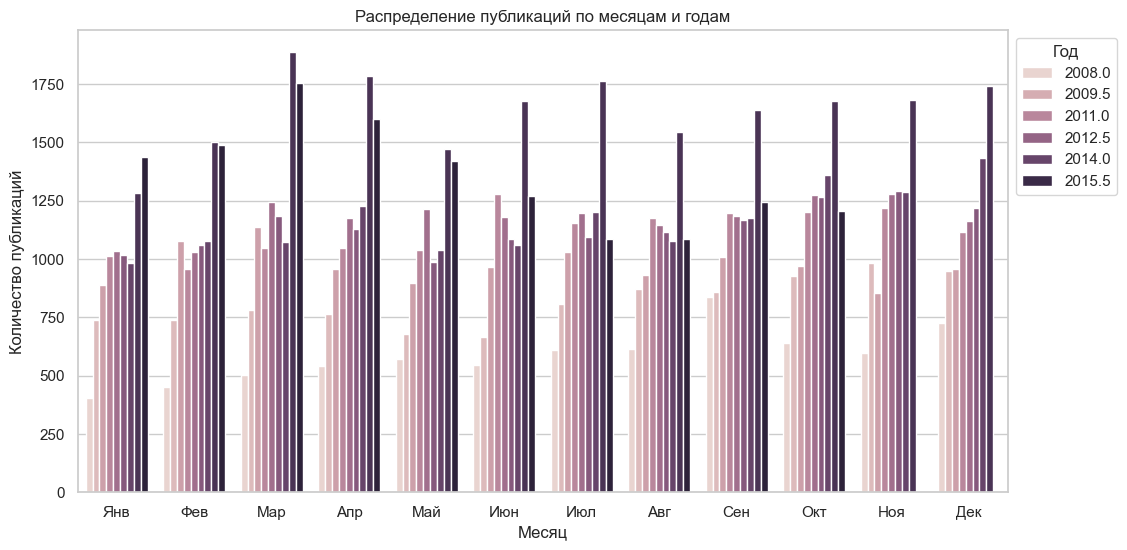

In [30]:
plt.figure(figsize=(12, 6))

sorted_years = sorted(df["year"].unique())

sns.countplot(data=df, x="month", hue="year", hue_order=sorted_years)

plt.xlabel("Месяц")
plt.ylabel("Количество публикаций")
plt.title("Распределение публикаций по месяцам и годам")
plt.xticks(range(12), [
    "Янв", "Фев", "Мар", "Апр", "Май", "Июн",
    "Июл", "Авг", "Сен", "Окт", "Ноя", "Дек"
])
plt.legend(title="Год", bbox_to_anchor=(1, 1))

plt.show()

6. Используя Seaborn, постройте график зависимости числа публикаций от дня недели, используя параметр hue. 

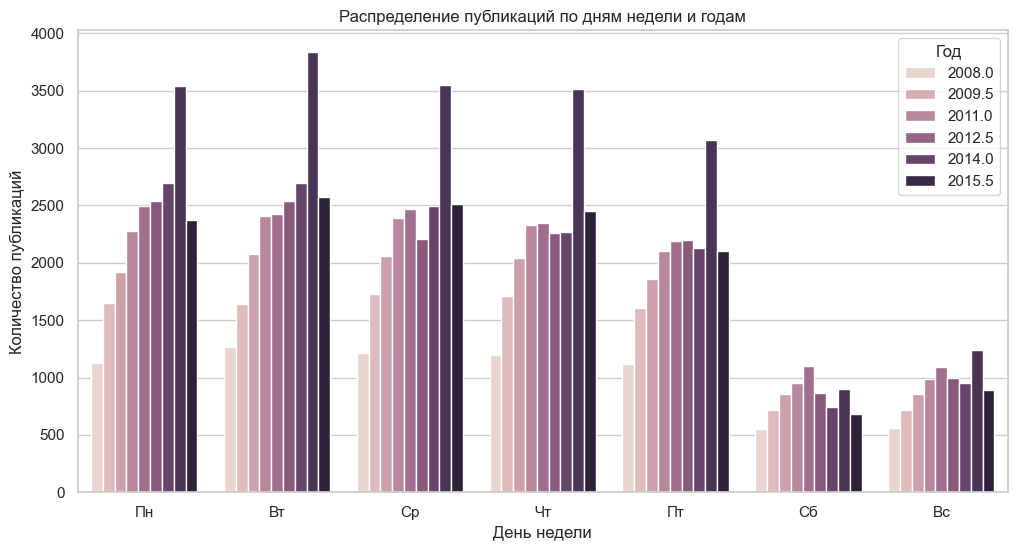

In [31]:
plt.figure(figsize=(12, 6))

sorted_years = sorted(df["year"].unique())

sns.countplot(data=df, x="dayofweek", hue="year", hue_order=sorted_years)

plt.xlabel("День недели")
plt.ylabel("Количество публикаций")
plt.title("Распределение публикаций по дням недели и годам")

plt.xticks(range(7), ["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"])

plt.legend(title="Год", bbox_to_anchor=(1, 1))

plt.show()

7. Используя Seaborn, проведите визуальный анализ и отметьте верные утверждения 
про данный датасет: 
- Больше всего просмотров набирают статьи, опубликованные в 12 часов дня 
- У опубликованных в 10 утра постов больше всего комментариев 
- Больше всего просмотров набирают статьи, опубликованные в 6 часов утра 
- Максимальное число комментариев на гиктаймсе набрала статья, 
опубликованная в 9 часов вечера 
- На хабре дневные статьи комментируют чаще, чем вечерние

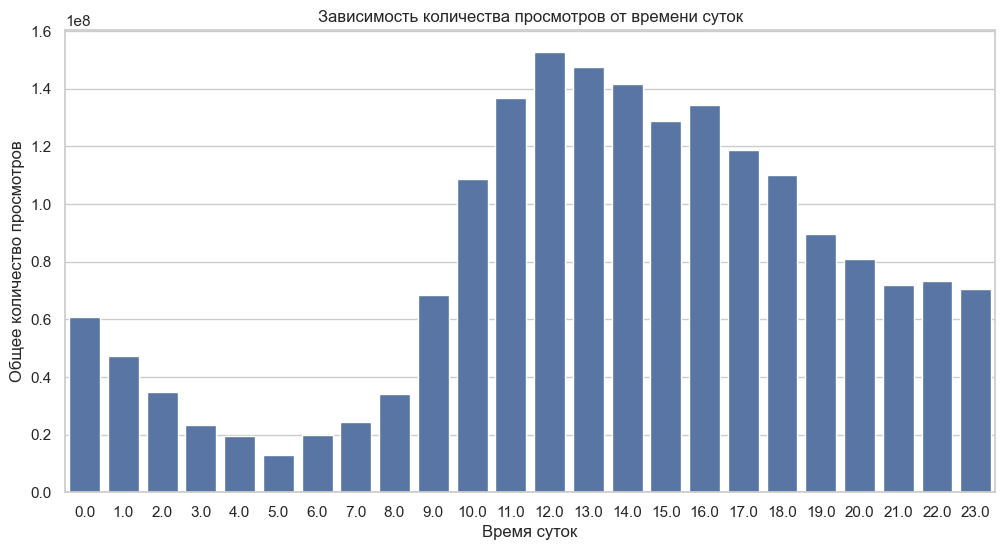

In [32]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x="hour", y="views", estimator=sum, errorbar=None)

plt.xlabel("Время суток")
plt.ylabel("Общее количество просмотров")
plt.title("Зависимость количества просмотров от времени суток")

plt.show()

Больше всего просмотров набирают статьи, опубликованные в 12 часов дня - **ВЕРНО**


Больше всего просмотров набирают статьи, опубликованные в 6 часов утра - **НЕВЕРНО**

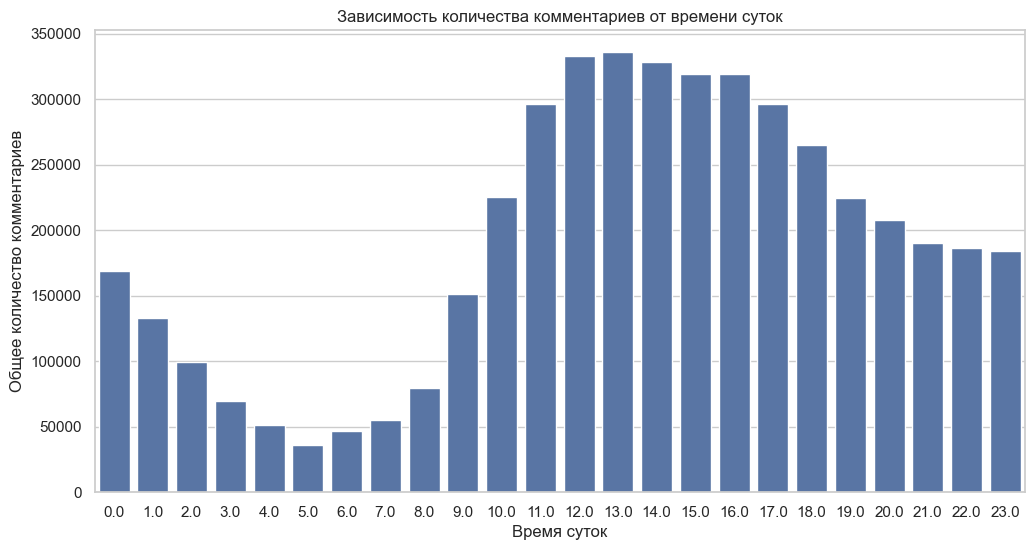

In [33]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x="hour", y="comments", estimator=sum, errorbar=None)

plt.xlabel("Время суток")
plt.ylabel("Общее количество комментариев")
plt.title("Зависимость количества комментариев от времени суток")

plt.show()

У опубликованных в 10 утра постов больше всего комментариев - **НЕВЕРНО**

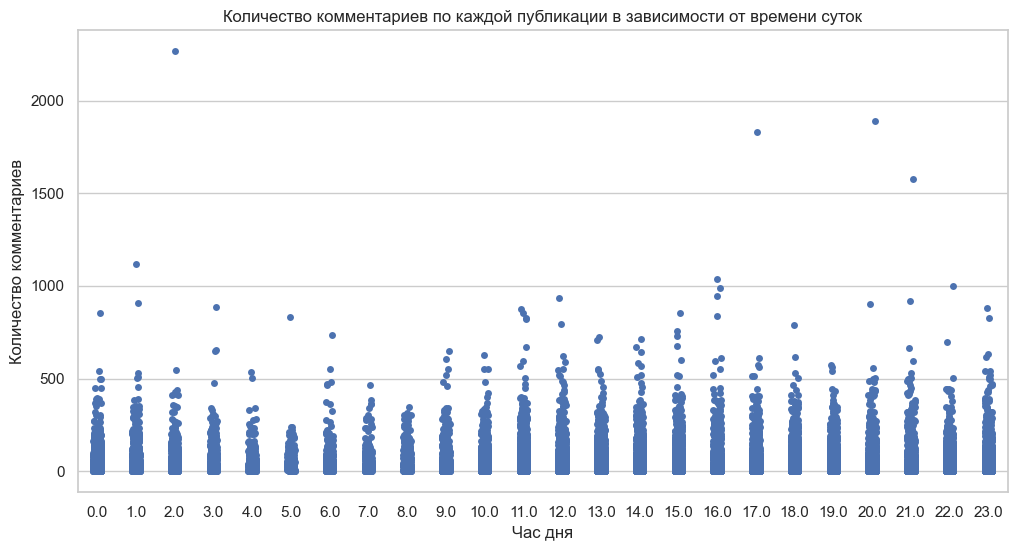

In [35]:
plt.figure(figsize=(12, 6))

sns.stripplot(data=df[df.domain == 'geektimes.ru'], x="hour", y="comments")

plt.xlabel("Час дня")
plt.ylabel("Количество комментариев")
plt.title("Количество комментариев по каждой публикации в зависимости от времени суток")

plt.show()

Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера - **НЕВЕРНО**

Text(0.5, 1.0, 'Зависимость количества комментариев от времени суток')

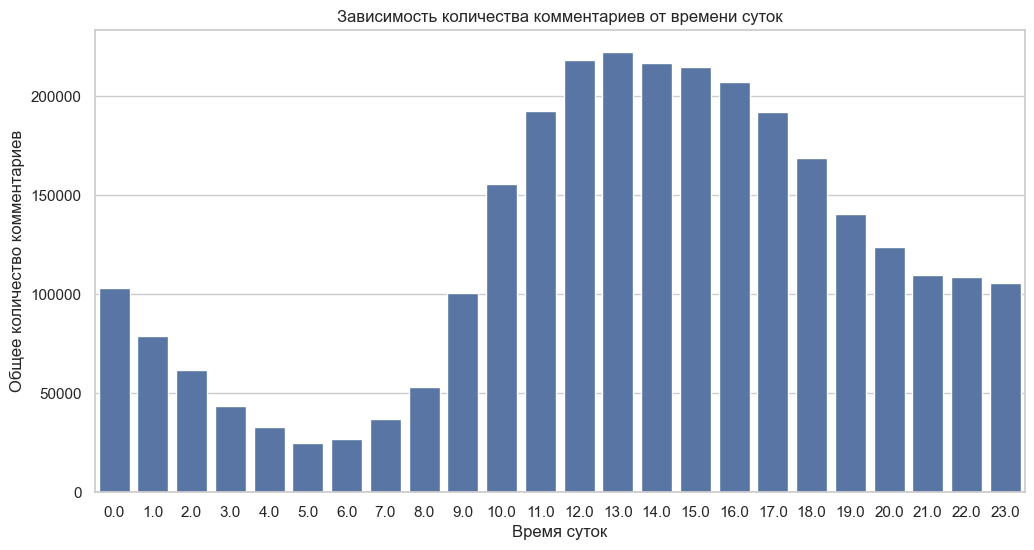

In [36]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df[df.domain == 'habrahabr.ru'], x="hour", y="comments", estimator=sum, errorbar=None)

plt.xlabel("Время суток")
plt.ylabel("Общее количество комментариев")
plt.title("Зависимость количества комментариев от времени суток")

На хабре дневные статьи комментируют чаще, чем вечерние - **ВЕРНО**

8. Используя Seaborn, проведите визуальный анализ и определите кого из топ-20 
авторов чаще всего минусуют? 

Text(0, 0.5, 'Автор')

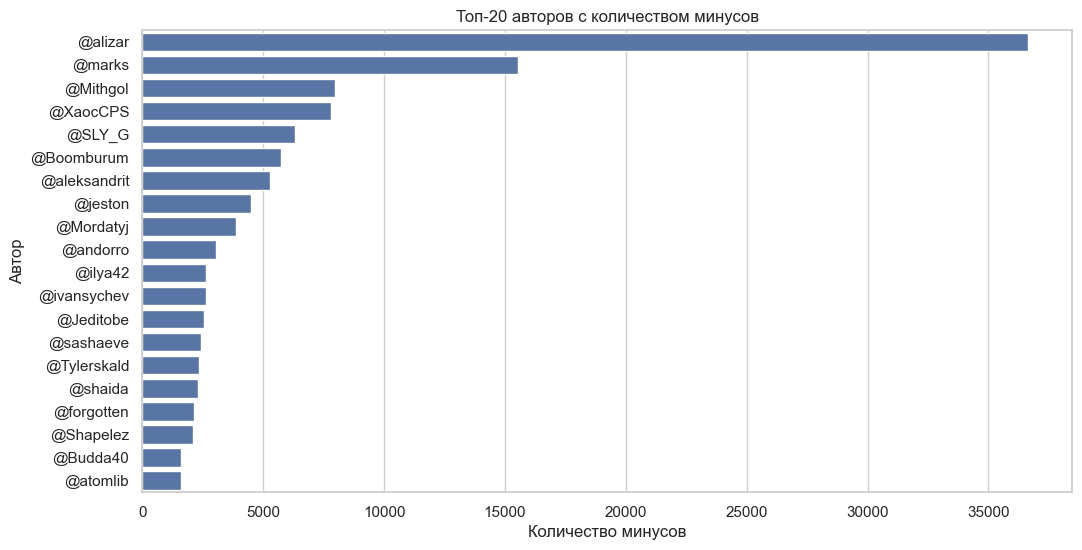

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df.groupby('author')['votes_minus'].sum().reset_index().nlargest(20, 'votes_minus'), x='votes_minus', y='author')

plt.title('Топ-20 авторов с количеством минусов')
plt.xlabel('Количество минусов')
plt.ylabel('Автор')

Больше всего минусов у **@alizar**

9. Используя Seaborn, проведите визуальный анализ и сравните субботы и 
понедельники. Правда ли, что по субботам авторы пишут в основном днём, а по 
понедельникам — в основном вечером? 

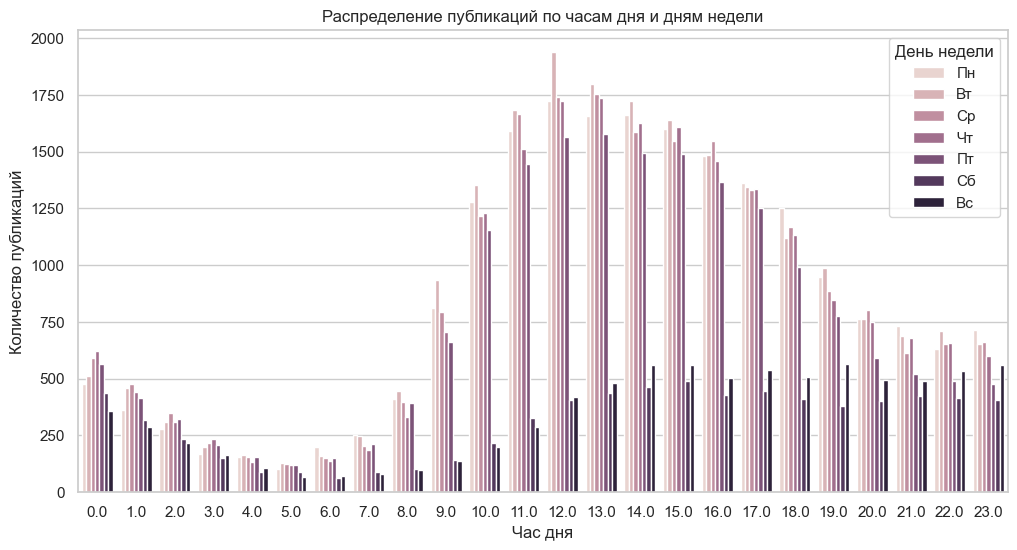

In [38]:
plt.figure(figsize=(12, 6))

days_order = [1, 2, 3, 4, 5, 6, 7]
days_labels = ["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"]

sns.countplot(data=df, x="hour", hue="dayofweek", hue_order=days_order)

plt.xlabel("Час дня")
plt.ylabel("Количество публикаций")
plt.title("Распределение публикаций по часам дня и дням недели")

plt.legend(title="День недели", labels=days_labels, bbox_to_anchor=(1, 1))

plt.show()


Не совсем так. В субботу действительно пишут в основном днем, но и в понедельник тоже.